In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import statsmodels.api as sm
%matplotlib inline

In [2]:
#import the cleaned data set
df=pd.read_csv('Zillow_cleaned_data.csv', index_col=0)

In [3]:
df.head()

,area in sqft,baths,beds,latitude,longitude,monthly price in $
0,3075.0,3.0,5.0,33.004779,-117.11568,4200.0
1,1454.0,3.0,3.0,32.997999,-117.07016,2750.0
2,1200.0,2.5,2.0,32.737260,-117.17339,4000.0
3,900.0,1.5,2.0,32.756715,-117.11222,2150.0
4,839.0,2.0,2.0,32.751067,-117.10532,2100.0


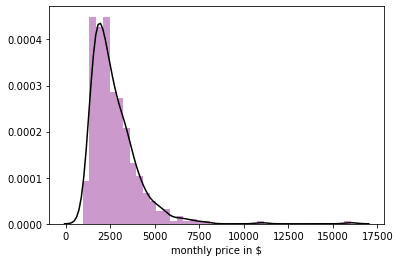

In [4]:
#seaborn distribution plot for the 'monthly prive in $'' column
sns.distplot(df['monthly price in $'], color='purple',
            kde_kws={"color": "k"})

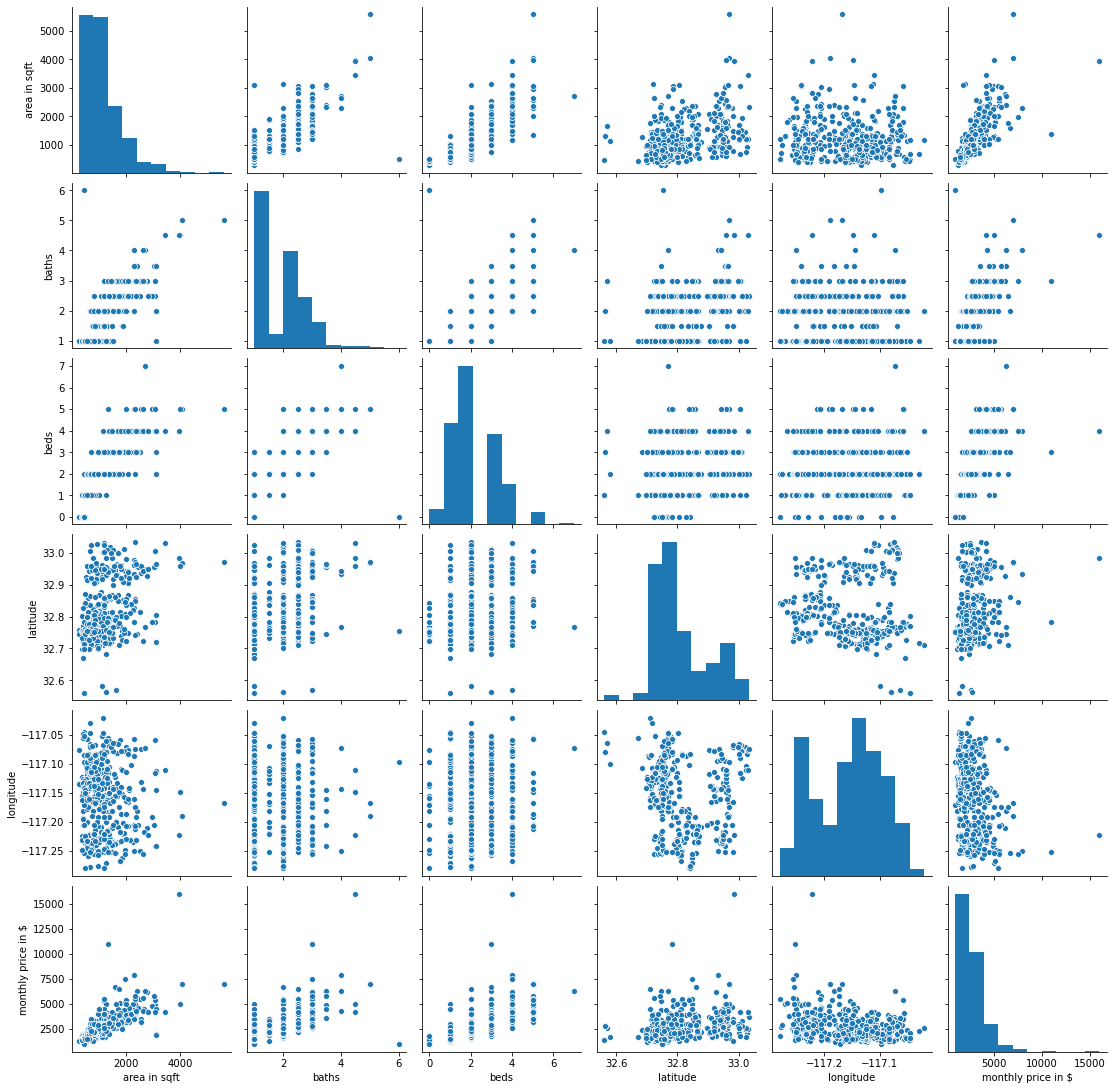

In [5]:
#use the seaborn pairplot to observe the correlation between the features
sns.pairplot(df)

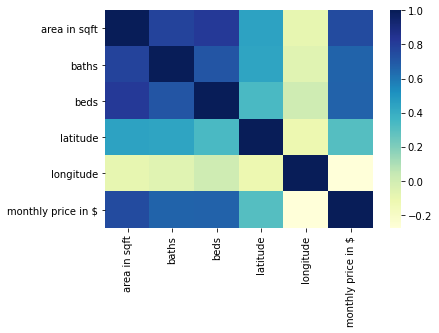

In [6]:
#show the correlation between the items
sns.heatmap(df.corr(), cmap='YlGnBu')

Text(0, 0.5, 'Price')

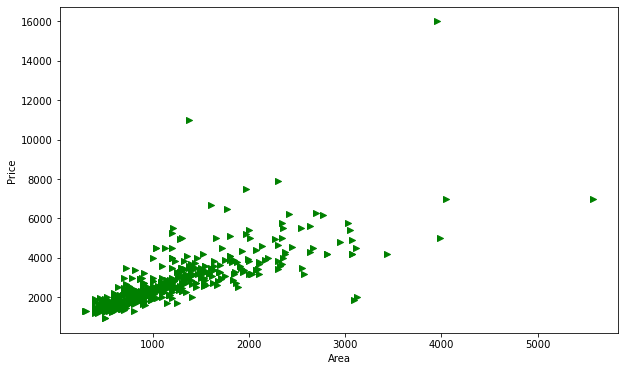

In [7]:
#show the correlation between the area and the monthly price
plt.figure(figsize=(10,6))
plt.scatter(df['area in sqft'], df['monthly price in $'], c='green', marker='>')
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

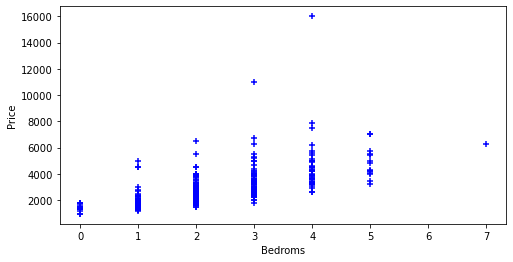

In [8]:
#show the correlation between the price and the bedrooms
plt.figure(figsize=(8,4))
plt.scatter(df['beds'], df['monthly price in $'], c='blue', marker='+')
plt.xlabel('Bedroms')
plt.ylabel('Price')

# Model Training and Prediction 

In [9]:
#dividing and train dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
X=df[['area in sqft', 'baths', 'beds', 'latitude', 'longitude']]
y=df['monthly price in $']

In [11]:
#20% are test samples, 80% is used for model training
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=40)

## Linear Regression

In [12]:
lm = LinearRegression()

In [13]:
# train our linear regression model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
predict=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

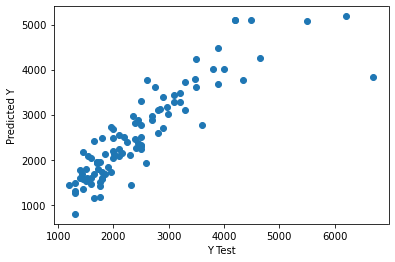

In [15]:
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [16]:
#Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, predict))

MAE: 355.53680473101355


## Model Performance

#### Linear Regression Model Score

In [17]:
#evaluation the score of our model
lm.score(X_test, y_test) #76,44 % 

0.764366848492277

## K fold cross validation score

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y , cv=cv)

array([0.58792164, 0.6508015 , 0.52600388, 0.55771007, 0.68703511,
       0.58485269, 0.70415102, 0.55599891, 0.77230095, 0.72052416])

## Grid Search CV and Hypterparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [84]:
#Grid Search CV should find the best algorithm 

#we provide X and y as out input
def GridSearchCV_Function(X,y): 
    algos = {
        #Algorithm- Linear Regression
        'linear_regression' : {
            'model': LinearRegression(),
            #Parameters Specification
            'params': {
                'normalize': [True, False]
            }
        },
        #Algorithm- Lasso Regression
        'lasso': {
            #Parameters Specification
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        #Algorithm- Decision Tree
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            #Parameters Specification
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    #empty list
    scores = []
    # here we take 10 folds for cross validation
    # we take a test size of 20%
    cv = ShuffleSplit(n_splits=15, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        #results will be appended in the list
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    #return the results in a data frame
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# Call the function
GridSearchCV_Function(X,y)



,model,best_score,best_params
0,linear_regression,0.640903,{'normalize': True}
1,lasso,0.641770,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.400585,"{'criterion': 'mse', 'splitter': 'random'}"
